In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

from utils.schemas import *
from utils.functions import *

In [2]:
df_imp = pd.read_csv('docs/ft_importances_20190811.csv')

In [3]:
X_cols = df_imp[df_imp.importance > 0.1].feature.to_list()

In [4]:
data_folder = 'input'

In [5]:
train = pd.read_csv(data_folder+'/train_ft_eng_0.csv', dtype = schema_generated_0, usecols=X_cols+['isFraud', 'TransactionDT'])
# test = pd.read_csv(data_folder+'/test_ft_eng_0.csv', dtype = schema_generated_0, usecols=X_cols)

In [6]:
train.shape

(590540, 245)

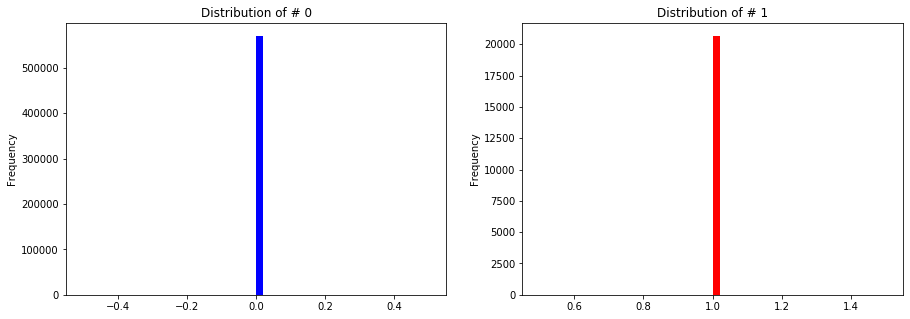

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train[train.isFraud == 0].isFraud.plot.hist(ax=ax[0], color = 'blue', bins=50)
ax[0].set_title('Distribution of # 0')
train[train.isFraud == 1].isFraud.plot.hist(ax=ax[1], color = 'red', bins=50)
ax[1].set_title('Distribution of # 1')
plt.show()

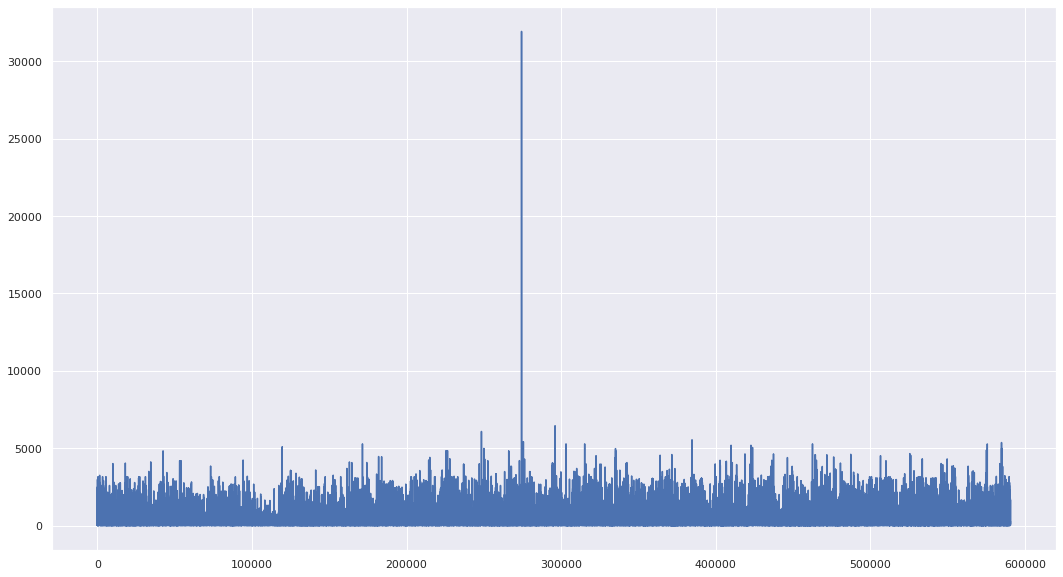

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(list(range(train.TransactionAmt.shape[0])), train.TransactionAmt)
plt.show()

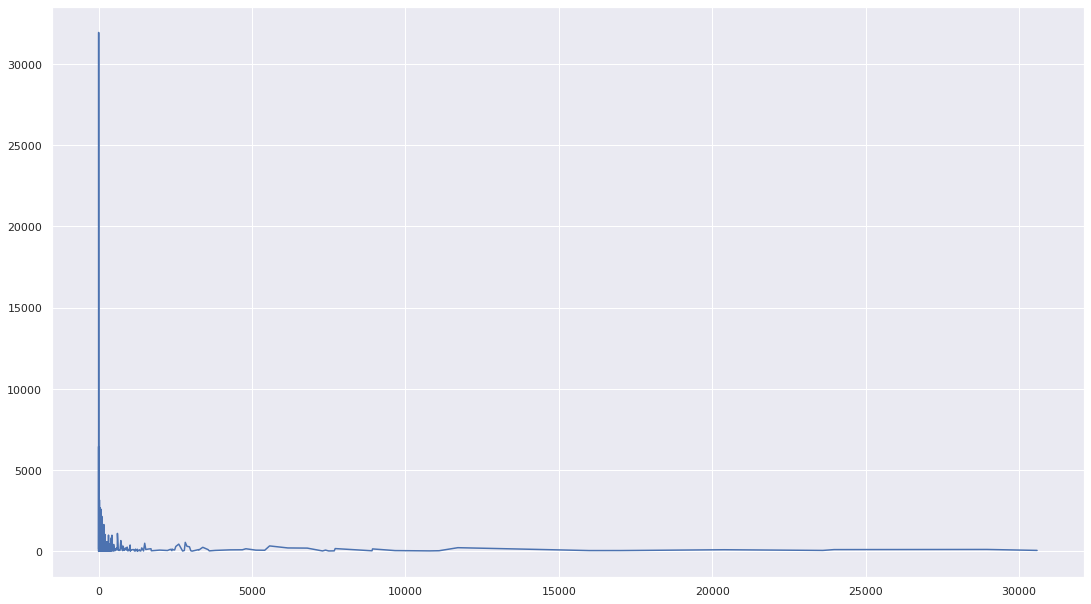

In [32]:
train.TransactionAmt.value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(train.TransactionAmt.value_counts(), train.TransactionAmt.value_counts().index.to_list())
plt.show()

In [17]:
import seaborn as sns
sns.set()

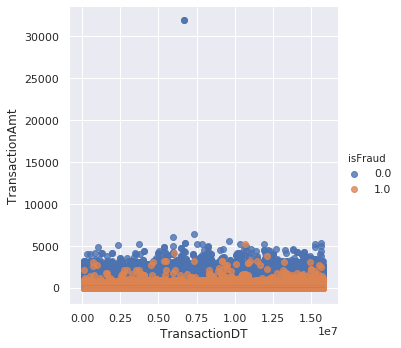

In [34]:
import seaborn as sns
sns.set()

# Ver si utilizando el std o la media en TransactionAmt aumenta el target
g = sns.lmplot(x="TransactionDT", y="TransactionAmt", hue="isFraud",
               truncate=True, height=5, data=train[['TransactionDT', 'TransactionAmt', 'isFraud']])


In [42]:
card_tran = train.groupby(['card1', 'TransactionAmt']).count()

In [45]:
group1 = card_tran['TransactionDT']
group1.name = 'card_count_transaction'
train2 = train.join(group1, on=['card1', 'TransactionAmt'])

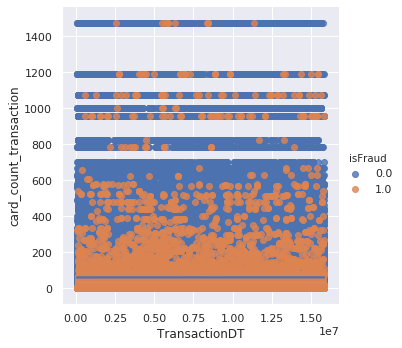

In [47]:
g = sns.lmplot(x="TransactionDT", y="card_count_transaction", hue="isFraud",
               truncate=True, height=5, data=train2[['TransactionDT', 'card_count_transaction', 'isFraud']])